# Detecting Covid-19 with Keras neural network

## 0. Import and loading

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train_path = r'D:\MasterBigData\Didattica\DL\Progetto\576013_1042828_bundle_archive\COVID-19 Radiography Database\train'
test_path = r'D:\MasterBigData\Didattica\DL\Progetto\576013_1042828_bundle_archive\COVID-19 Radiography Database\test'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
                                ##augmentation parameters:
                                  # ,shear_range=0.2, 
                                  # zoom_range=0.2, 
                                  # horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [83]:
batch = 32
train_it = train_datagen.flow_from_directory(train_path,
                                     target_size=(256, 256),
                                     batch_size=batch,
                                     color_mode="rgb",
                                     class_mode="categorical",
                                     #shuffle=True,
                                     #seed=42
                                            )
# load and iterate test dataset
test_it = test_datagen.flow_from_directory(test_path, 
                                     target_size=(256, 256),
                                     batch_size=batch,
                                     color_mode="rgb",
                                     class_mode="categorical",
                                     #shuffle=True,
                                     #seed=42
                                          )

Found 492 images belonging to 3 classes.
Found 123 images belonging to 3 classes.


## 1. Our models

In [84]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D

classifier = Sequential()

classifier.add(Convolution2D(61, 3, 2, input_shape = (256, 256, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(3, activation='softmax'))

classifier.compile( optimizer="adam",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

In [115]:
model = Sequential()

model.add( Conv2D(32, (3, 3), input_shape=(256, 256, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(64, (3, 3), input_shape=(256, 256, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Flatten() )
model.add( Dense(128) )
model.add( Activation("relu") )

model.add(Dense(3, activation='softmax'))

model.compile( optimizer="rmsprop",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

In [116]:
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_22 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
activation_23 (Activation)   (None, 125, 125, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 246016)           

## 2. Fitting

In [87]:
#definiamo step_size per train e test
STEP_SIZE_TRAIN=train_it.n//train_it.batch_size
STEP_SIZE_VALID=test_it.n//test_it.batch_size
print('STEP_SIZE_TRAIN:',STEP_SIZE_TRAIN)
print('STEP_SIZE_VALID:',STEP_SIZE_VALID)

STEP_SIZE_TRAIN: 15
STEP_SIZE_VALID: 3


In [117]:
hist = model.fit_generator(generator=train_it,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_it,
                    validation_steps=STEP_SIZE_VALID,
                    epochs= 2)

Epoch 1/2
15/15 [==============================] - 22s 1s/step - loss: 1.9680 - accuracy: 0.4652 - val_loss: 0.7183 - val_accuracy: 0.7083
Epoch 2/2
15/15 [==============================] - 23s 2s/step - loss: 0.4013 - accuracy: 0.8565 - val_loss: 0.4756 - val_accuracy: 0.8242


## 3. Evaluation

In [107]:
evaluation = model.evaluate_generator(generator=test_it,
steps=STEP_SIZE_VALID)

In [108]:
evaluation

[0.7560538053512573, 0.75]

Accuracy: 0.6934783
Accuracy: 0.692307710647583


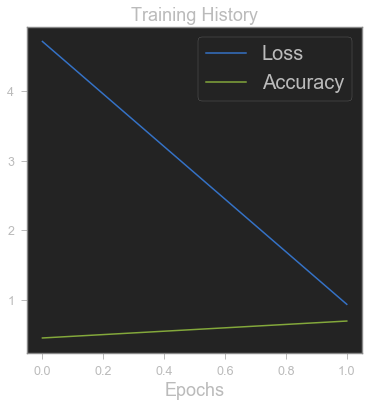

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(figsize=(6,6))

axes.plot(hist.history['loss'], label='Loss')
axes.plot(hist.history['accuracy'], label='Accuracy')

axes.set_title("Training History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)

# Final accuracy
print ("Accuracy:", hist.history['accuracy'][-1])
# Final accuracy val
print ("Accuracy:", hist.history['val_accuracy'][-1])

In [121]:
model.predict_generator(test_it)[0]

array([0.00276853, 0.95346004, 0.04377146], dtype=float32)

In [112]:
np.argmax(model.predict_generator(test_it), axis=1)

array([1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1,
       1, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0,
       2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [110]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [111]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# convert form prediction to id
y_pred = model.predict_generator(test_it)
y_pred = np.argmax(y_pred, axis=1) # argmax along axis 1

y_true = test_it.labels # argmax along axis 1

# compute confusion matrix
print ("Confusion Matrix")
print ( confusion_matrix(y_true, y_pred) )
print()

# compute classification report
print ("Classification Report")
print ( classification_report(y_true, y_pred) )

Confusion Matrix
[[12 21  8]
 [13 21  7]
 [11 20 10]]

Classification Report
              precision    recall  f1-score   support

           0       0.33      0.29      0.31        41
           1       0.34      0.51      0.41        41
           2       0.40      0.24      0.30        41

    accuracy                           0.35       123
   macro avg       0.36      0.35      0.34       123
weighted avg       0.36      0.35      0.34       123



In [78]:
#comando per salvare il modello
classifier.save(r'C:\Users\Gianl\OneDrive\Documenti\progetto Deep learning\COVID-19 Radiography Database\model')